In [1]:
## Commencer par GUIT, inserer le repertoire sur guithub
## Mettre en place, un guit 
## Commencer par l'analyse exploratoire 
## entrainer le model de classification, 
## Mettre en place L'api ( Guit GUITHUB)
## Utiliser l'api

In [2]:
## Manipulation des données
import numpy as np
import pandas as pd

## Bibliotheques graphiques
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.model_selection import KFold
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier

from xgboost import XGBClassifier

from fonctions import *
import lightgbm as lgb
import gc

from sklearn.metrics import recall_score,precision_score,roc_auc_score,confusion_matrix,ConfusionMatrixDisplay,f1_score

from collections import Counter

from imblearn.under_sampling import RandomUnderSampler, NearMiss, TomekLinks
from imblearn.over_sampling import RandomOverSampler, SMOTE

import pickle

In [3]:
def plot_feature_importances(df):
    """
    Plot importances returned by a model. This can work with any measure of
    feature importance provided that higher importance is better. 
    
    Args:
        df (dataframe): feature importances. Must have the features in a column
        called `features` and the importances in a column called `importance
        
    Returns:
        shows a plot of the 15 most importance features
        
        df (dataframe): feature importances sorted by importance (highest to lowest) 
        with a column for normalized importance
        """
    
    # Sort features according to importance
    df = df.sort_values('importance', ascending = False).reset_index()
    
    # Normalize the feature importances to add up to one
    df['importance_normalized'] = df['importance'] / df['importance'].sum()

    # Make a horizontal bar chart of feature importances
    plt.figure(figsize = (10, 6))
    ax = plt.subplot()
    
    # Need to reverse the index to plot most important on top
    ax.barh(list(reversed(list(df.index[:15]))), 
            df['importance_normalized'].head(15), 
            align = 'center', edgecolor = 'k')
    
    # Set the yticks and labels
    ax.set_yticks(list(reversed(list(df.index[:15]))))
    ax.set_yticklabels(df['feature'].head(15))
    
    # Plot labeling
    plt.xlabel('Normalized Importance'); plt.title('Feature Importances')
    plt.show()
    
    return df

In [4]:
def characteristic_classifier(y_test,y_predict):
    
    recall=recall_score(y_test,y_predict)
    precision=precision_score(y_test,y_predict)
    roc_score=roc_auc_score(y_test,y_predict)
    cm = confusion_matrix(y_test, y_predict)
    f1 = f1_score(y_test, y_predict)
    
    return recall,precision,roc_score,cm,f1

In [5]:
def df_score_classifier(df_scores,modele,score,precision,roc_score,cm,f1):
    
    df_scores.loc[df_scores.shape[0]] = [type(modele).__name__,score,precision,roc_score,cm,f1]
    df_scores.sort_values(by='precision', ascending=False, inplace=True)
    df_scores.drop_duplicates(subset=['modele'], keep='last', inplace=True)
    df_scores.reset_index(drop=True, inplace=True)
    
    return df_scores

In [6]:
def feature_importances(X_train, y_train,X_test,y_test,modele):
    model = modele
    model.fit(X_train, y_train)

    feature_importance_values = model.feature_importances_
    feature_importances_model = pd.DataFrame({'feature': features, 'importance': feature_importance_values})

    # Make predictions on the test data
    y_predict = model.predict(X_test)
       
    return feature_importances_model,y_predict

In [7]:
def model_classifier(X_train, y_train,X_test,y_test,modele):
    model = modele
    model.fit(X_train, y_train)

    feature_importance_values = model.feature_importances_
    feature_importances_model = pd.DataFrame({'feature': features, 'importance': feature_importance_values})

    # Make predictions on the test data
    y_predict = model.predict(X_test)
       
    return feature_importances_model,y_predict

In [8]:
def model_classifier(X_train, y_train,X_test,y_test,modele):
    model = modele
    model.fit(X_train, y_train)

    feature_importance_values = model.feature_importances_
    feature_importances_model = pd.DataFrame({'feature': features, 'importance': feature_importance_values})

    # Make predictions on the test data
    y_predict = model.predict(X_test)
       
    return feature_importances_model,y_predict

In [9]:
def training_classifier(df_scores,modele):

    feature_importances_model,y_predict = model_classifier(X_train, y_train,X_test,y_test,modele)
    
    recall,precision,roc_score,cm,f1=characteristic_classifier(y_test,y_predict)
    recherche_classifier=df_score_classifier(df_scores,modele,recall,precision,roc_score,cm,f1)
    
    return recherche_classifier,feature_importances_model,y_predict

In [10]:
def barplot_classifier(df,label_x,label_y):

    #sns.set(rc={'figure.figsize':(14,14)})
    plt.figure(figsize=(10, 5))

    img=sns.barplot(x=df[label_x],
                           y=df[label_y]
                           ) 
    for p in img.patches:
        img.annotate(format(round(p.get_width(),2)),
                          (p.get_width() - 0.1, p.get_y() + 0.05 + p.get_height()),
                          color='#ffffff',
                          fontsize=20,
                          xytext=(15, 10),
                          textcoords='offset points')

    plt.ylabel(label_y, size=13, weight='bold')
    plt.xlabel(label_x, size=13, weight='bold')
    
    return 

In [11]:
def cout_fonction(tn,fp,fn,tp,a,b,modele,df_cout):
    # premier cas si le coeff de fp est superieur au coef de fn 
    score_cout = 2*tp/(2*tp+a*fn+b*fp)
    
    df_cout.loc[df_cout.shape[0]] = [type(modele).__name__,score_cout]
    df_cout.sort_values(by='score_cout', ascending=False, inplace=True)
    df_cout.drop_duplicates(subset=['modele'], keep='last', inplace=True)
    df_cout.reset_index(drop=True, inplace=True)
    return df_cout

In [12]:
app_train=pd.read_csv('app_train_domain.csv')
app_test=pd.read_csv('app_test_domain.csv')

In [13]:
enumerate(app_test['SK_ID_CURR'])

In [14]:
id=100003

In [15]:
app_test[app_test['SK_ID_CURR']==id]

,SK_ID_CURR,NAME_CONTRACT_TYPE,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,...,"WALLSMATERIAL_MODE_Stone, brick",WALLSMATERIAL_MODE_Wooden,EMERGENCYSTATE_MODE_No,EMERGENCYSTATE_MODE_Yes,Age,DAYS_EMPLOYED_ANOM,CREDIT_INCOME_PERCENT,ANNUITY_INCOME_PERCENT,CREDIT_TERM,DAYS_EMPLOYED_PERCENT


In [16]:
app_test['SK_ID_CURR'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 48744 entries, 0 to 48743
Series name: SK_ID_CURR
Non-Null Count  Dtype
--------------  -----
48744 non-null  int64
dtypes: int64(1)
memory usage: 380.9 KB


In [17]:
id in list(app_test['SK_ID_CURR'])

False

In [18]:
a=app_test[app_test['SK_ID_CURR']==id]

In [19]:
    if (id in list(app_test['SK_ID_CURR']))==True:
        print('il est')
    elif (id in list(app_test['SK_ID_CURR']))==False:
        print('il nest pas')

il nest pas


## Logistic Regression Implementation

In [20]:
train_labels=app_train['TARGET']

In [21]:

# Drop the target from the training data
if 'TARGET' in app_train:
    train = app_train.drop(columns = ['TARGET'])
else:
    train = app_train.copy()
    
# Feature names
features = list(train.columns)

train=imputer(train,SimpleImputer(strategy = 'median'))
train=imputer(train,MinMaxScaler(feature_range = (0, 1)))

In [22]:
test = app_test.copy()

test=imputer(test,SimpleImputer(strategy = 'median'))
test=imputer(test,MinMaxScaler(feature_range = (0, 1)))

In [23]:
log_reg = LogisticRegression(C = 0.0001)
log_reg.fit(train, train_labels)

LogisticRegression(C=0.0001)

In [24]:
log_reg_pred = log_reg.predict_proba(test)[:, 1]

In [25]:
submit = app_test[['SK_ID_CURR']]
submit['TARGET'] = log_reg_pred

submit.head()

C:\Users\huama\AppData\Local\Temp\ipykernel_4316\3970473317.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  submit['TARGET'] = log_reg_pred


,SK_ID_CURR,TARGET
0,100001,0.065241
1,100005,0.116583
2,100013,0.066872
3,100028,0.071306
4,100038,0.119277


In [26]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(train, train_labels, test_size=0.3, random_state=42)

In [27]:
score=[]
df_scores = pd.DataFrame(score, columns=['modele', 'recall','precision','roc_score','confusion_matrix','f1_score'])

In [28]:
random_forest = RandomForestClassifier(n_estimators = 100, random_state = 50, verbose = 1, n_jobs = -1)
gradient_boosting = GradientBoostingClassifier(n_estimators = 100, random_state = 50, verbose = 1)
dtc = DecisionTreeClassifier()
xgb=XGBClassifier()
lgbm=lgb.LGBMClassifier(n_estimators=10000, objective = 'binary', 
                                   class_weight = 'balanced', learning_rate = 0.05, 
                                   reg_alpha = 0.1, reg_lambda = 0.1, 
                                   subsample = 0.8, n_jobs = -1, random_state = 50)

In [29]:
models= [random_forest,gradient_boosting,dtc,xgb,lgbm]

## Random Forest

 Finaliser les modeles, comprendre le fonctionnement de precision, de score, roc, f_score, matrix de confusion 

In [30]:
df_scores,feature_importances_rf,y_pred_rf=training_classifier(df_scores,random_forest)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:   40.3s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  1.5min finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.6s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    2.2s finished


In [31]:
df_scores

,modele,recall,precision,roc_score,confusion_matrix,f1_score
0,RandomForestClassifier,0.001349,0.833333,0.500663,"[[84839, 2], [7403, 10]]",0.002694


In [32]:
tn_rf, fp_rf, fn_rf, tp_rf = df_scores['confusion_matrix'][0].ravel()

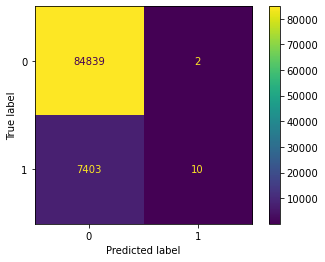

In [33]:
disp = ConfusionMatrixDisplay(confusion_matrix=df_scores['confusion_matrix'][0],
                              display_labels=random_forest.classes_)
disp.plot()

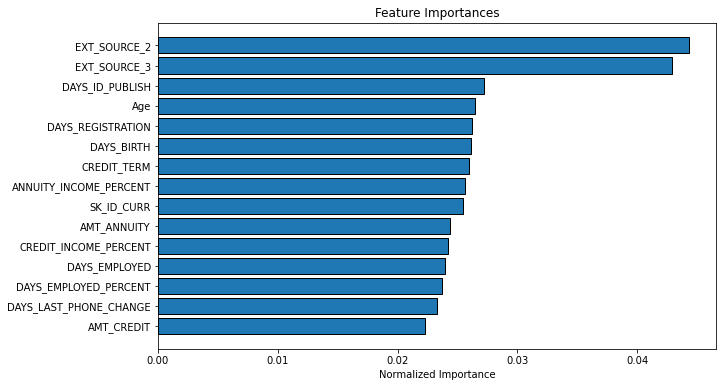

In [34]:
feature_importances_rf=plot_feature_importances(feature_importances_rf)

F1 = 2 * (precision * recall) / (precision + recall)
precision = +p / (tp + fp)
recall = tp / (tp + fn)

F1 = 2* tp^2/(tp(tp+fn)+tp(tp+fp)) = 2* tp^2/tp(2* tp + fn + fp) = 2 tp/ 2 * tp + fn +fp

fn+fp=0


## Gradient Boosting

In [35]:
df_scores,feature_importances_gb,y_pred_gb=training_classifier(df_scores,gradient_boosting)

      Iter       Train Loss   Remaining Time 
         1           0.5535           14.48m
         2           0.5473           13.42m
         3           0.5423           13.05m
         4           0.5385           12.41m
         5           0.5353           12.24m
         6           0.5324           11.86m
         7           0.5300           11.69m
         8           0.5277           11.51m
         9           0.5259           11.35m
        10           0.5240           11.29m
        20           0.5127            9.96m
        30           0.5058            8.67m
        40           0.5014            7.34m
        50           0.4983            6.07m
        60           0.4959            4.82m
        70           0.4938            3.63m
        80           0.4922            2.42m
        90           0.4906            1.20m
       100           0.4894            0.00s


In [36]:
tn_gb, fp_gb, fn_gb, tp_gb = df_scores['confusion_matrix'][1].ravel()

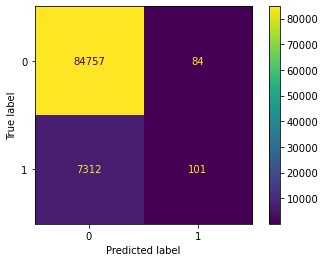

In [37]:
disp = ConfusionMatrixDisplay(confusion_matrix=df_scores['confusion_matrix'][1],
                              display_labels=gradient_boosting.classes_)
disp.plot()

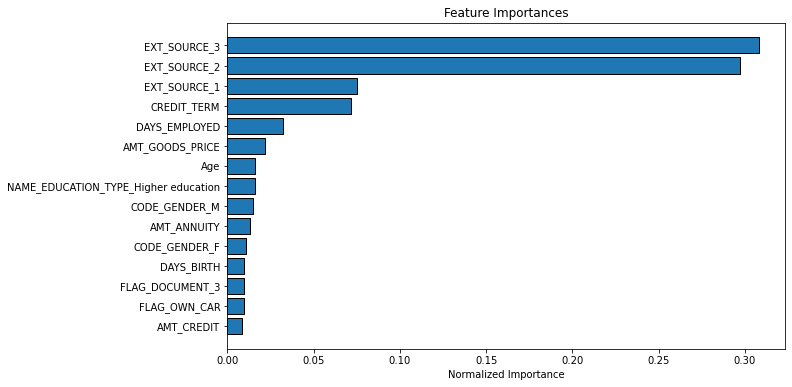

In [38]:
feature_importances_gb=plot_feature_importances(feature_importances_gb)

## Decision Tree Classifier

In [39]:
df_scores,feature_importances_dtc,y_pred_dtc=training_classifier(df_scores,dtc)

feature_importances_dtc,y_pred_dtc=model_classifier(X_train, y_train,X_test,y_test,dtc)
training_classifier(df_scores,dtc)

In [40]:
tn_dtc, fp_dtc, fn_dtc, tp_dtc = df_scores['confusion_matrix'][2].ravel()

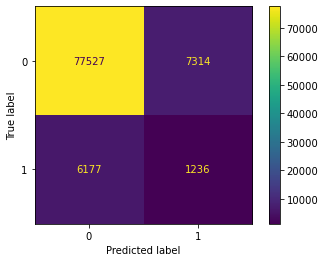

In [41]:
disp = ConfusionMatrixDisplay(confusion_matrix=df_scores['confusion_matrix'][2],
                              display_labels=dtc.classes_)
disp.plot()

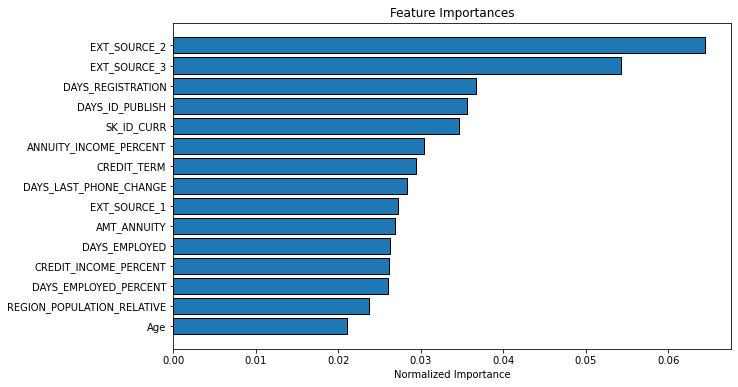

In [42]:
feature_importances_dtc=plot_feature_importances(feature_importances_dtc)

## XGBoost

In [43]:
df_scores,feature_importances_xgb,y_pred_xgb=training_classifier(df_scores,xgb)

feature_importances_xgb,y_pred_xgb=model_classifier(X_train, y_train,X_test,y_test,xgb)
training_classifier(df_scores,xgb)

In [44]:
tn_xgb, fp_xgb, fn_xgb, tp_xgb = df_scores['confusion_matrix'][2].ravel()

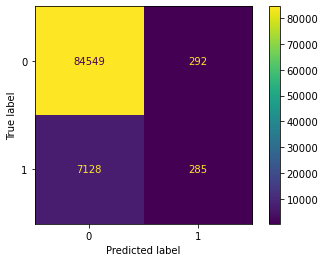

In [45]:
disp = ConfusionMatrixDisplay(confusion_matrix=df_scores['confusion_matrix'][2],
                              display_labels=xgb.classes_)
disp.plot()

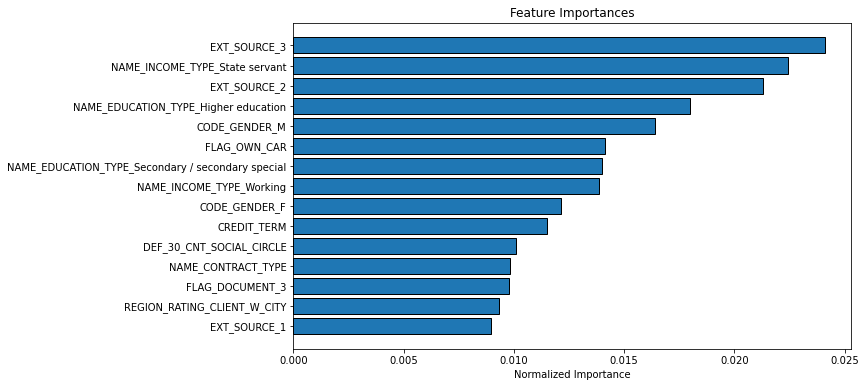

In [46]:
feature_importances_xgb=plot_feature_importances(feature_importances_xgb)

## LGBM

In [47]:
df_scores,feature_importances_lgbm,y_pred_lgbm=training_classifier(df_scores,lgbm)

feature_importances_lgbm,y_pred_lgbm=model_classifier(X_train, y_train,X_test,y_test,lgbm)
training_classifier(df_scores,lgbm)

In [48]:
tn_lgbm, fp_lgbm, fn_lgbm, tp_lgbm = df_scores['confusion_matrix'][2].ravel()

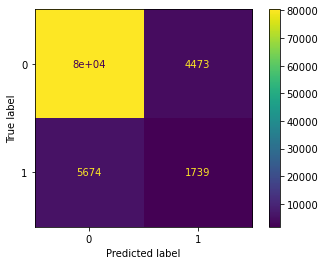

In [49]:
disp = ConfusionMatrixDisplay(confusion_matrix=df_scores['confusion_matrix'][3],
                              display_labels=lgbm.classes_)
disp.plot()

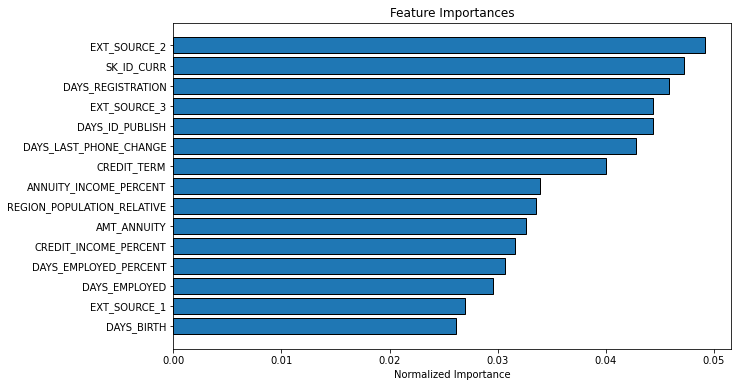

In [50]:
feature_importances_lgbm=plot_feature_importances(feature_importances_lgbm)

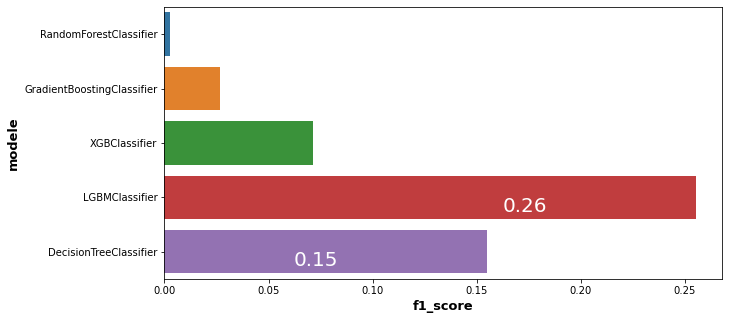

In [51]:
barplot_classifier(df_scores,'f1_score','modele')

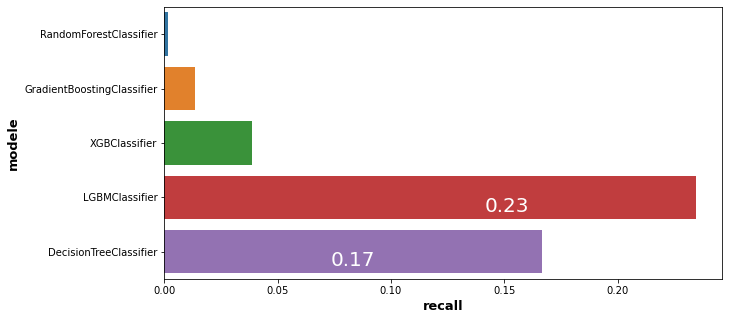

In [52]:
barplot_classifier(df_scores,'recall','modele')

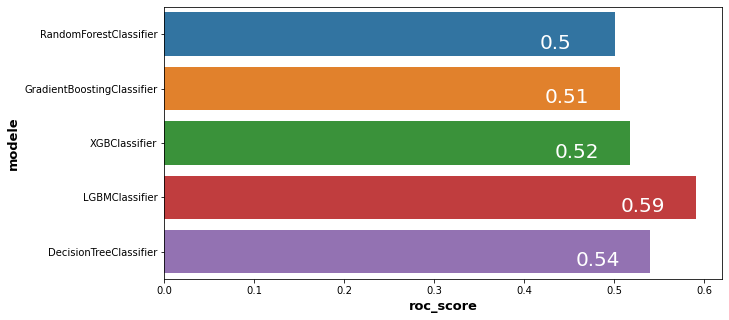

In [53]:
barplot_classifier(df_scores,'roc_score','modele')

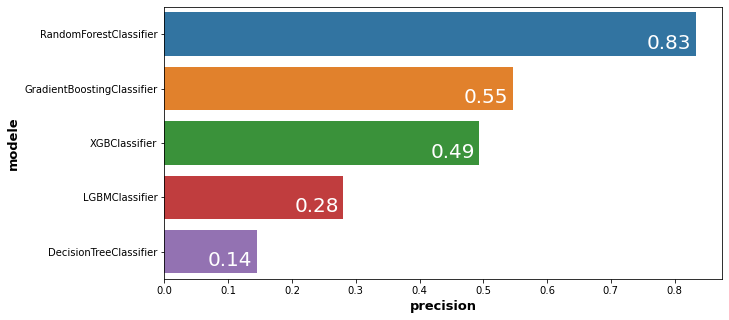

In [54]:
barplot_classifier(df_scores,'precision','modele')

In [55]:
score_sampler=[]
df_scores_samplers = pd.DataFrame(score_sampler, columns=['modele', 'recall','precision','roc_score','confusion_matrix','f1_score'])

In [56]:
score_cout=[]
df_score_cout = pd.DataFrame(score_cout, columns=['modele', 'score_cout'])

## Modeles sous-echantilloné 

In [57]:
rus = RandomUnderSampler(random_state=42, replacement=True)# fit predictor and target variable
x_rus, y_rus = rus.fit_resample(train, train_labels)
X_train, X_test, y_train, y_test = train_test_split(x_rus, y_rus, test_size=0.3, random_state=42)

In [58]:
df_scores_samplers,feature_importances_random_forest_rus,random_forest_prefict_rus=training_classifier(df_scores_samplers,random_forest)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    5.1s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   18.9s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.2s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    0.8s finished


In [59]:
tn_rf_rus, fp_rf_rus, fn_rf_rus, tp_rf_rus= df_scores_samplers['confusion_matrix'][0].ravel()
cout_fonction(tn_rf_rus, fp_rf_rus, fn_rf_rus, tp_rf_rus,0.1,0.9,random_forest,df_score_cout)

,modele,score_cout
0,RandomForestClassifier,0.818956


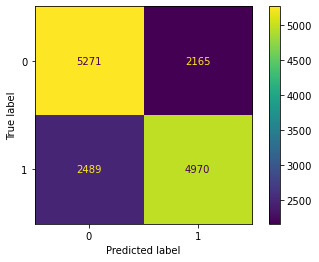

In [60]:
disp = ConfusionMatrixDisplay(confusion_matrix=df_scores_samplers['confusion_matrix'][0],
                              display_labels=random_forest.classes_)
disp.plot()

In [61]:
df_scores_samplers,feature_importances_gb_rus,gb_prefict_rus=training_classifier(df_scores_samplers,gradient_boosting)

      Iter       Train Loss   Remaining Time 
         1           1.3645            1.75m
         2           1.3463            1.75m
         3           1.3309            1.74m
         4           1.3178            1.72m
         5           1.3063            1.69m
         6           1.2965            1.67m
         7           1.2877            1.66m
         8           1.2800            1.64m
         9           1.2731            1.62m
        10           1.2668            1.60m
        20           1.2268            1.35m
        30           1.2032            1.16m
        40           1.1872           59.52s
        50           1.1771           49.31s
        60           1.1683           39.32s
        70           1.1615           29.39s
        80           1.1557           19.55s
        90           1.1495            9.76s
       100           1.1449            0.00s


In [62]:
tn_gb_rus, fp_gb_rus, fn_gb_rus, tp_gb_rus= df_scores_samplers['confusion_matrix'][1].ravel()
cout_fonction(tn_gb_rus, fp_gb_rus, fn_gb_rus, tp_gb_rus,0.1,0.9,gradient_boosting,df_score_cout)

,modele,score_cout
0,RandomForestClassifier,0.818956
1,GradientBoostingClassifier,0.818031


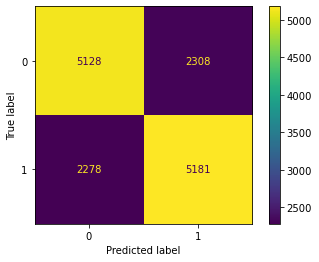

In [63]:
disp = ConfusionMatrixDisplay(confusion_matrix=df_scores_samplers['confusion_matrix'][1],
                              display_labels=gradient_boosting.classes_)
disp.plot()

In [64]:
df_scores_samplers,feature_importances_dtc_rus,dtc_prefict_rus=training_classifier(df_scores_samplers,dtc)

In [65]:
tn_dtc_rus, fp_dtc_rus, fn_dtc_rus, tp_dtc_rus= df_scores_samplers['confusion_matrix'][2].ravel()
cout_fonction(tn_dtc_rus, fp_dtc_rus, fn_dtc_rus, tp_dtc_rus,0.1,0.9,dtc,df_score_cout)

,modele,score_cout
0,RandomForestClassifier,0.818956
1,GradientBoostingClassifier,0.818031
2,DecisionTreeClassifier,0.754320


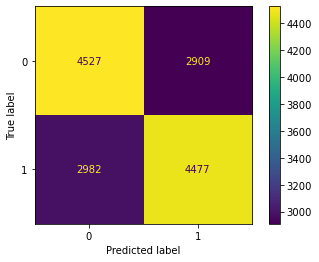

In [66]:
disp = ConfusionMatrixDisplay(confusion_matrix=df_scores_samplers['confusion_matrix'][2],
                              display_labels=dtc.classes_)
disp.plot()

In [67]:
df_scores_samplers,feature_importances_xgb_rus,xgb_prefict_rus=training_classifier(df_scores_samplers,xgb)

In [68]:
tn_xgb_rus, fp_xgb_rus, fn_xgb_rus, tp_xgb_rus= df_scores_samplers['confusion_matrix'][2].ravel()
cout_fonction(tn_xgb_rus, fp_xgb_rus, fn_xgb_rus, tp_xgb_rus,0.1,0.9,xgb,df_score_cout)

,modele,score_cout
0,RandomForestClassifier,0.818956
1,GradientBoostingClassifier,0.818031
2,XGBClassifier,0.816248
3,DecisionTreeClassifier,0.754320


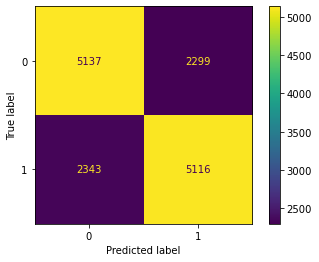

In [69]:
disp = ConfusionMatrixDisplay(confusion_matrix=df_scores_samplers['confusion_matrix'][2],
                              display_labels=xgb.classes_)
disp.plot()

In [70]:
df_scores_samplers,feature_importances_lgbm_rus,lgbm_prefict_rus=training_classifier(df_scores_samplers,lgbm)

In [71]:
tn_lgbm_rus, fp_lgbm_rus, fn_lgbm_rus, tp_lgbm_rus= df_scores_samplers['confusion_matrix'][0].ravel()
cout_fonction(tn_lgbm_rus, fp_lgbm_rus, fn_lgbm_rus, tp_lgbm_rus,0.1,0.9,lgbm,df_score_cout)

,modele,score_cout
0,LGBMClassifier,0.821524
1,RandomForestClassifier,0.818956
2,GradientBoostingClassifier,0.818031
3,XGBClassifier,0.816248
4,DecisionTreeClassifier,0.754320


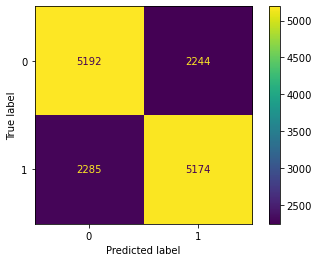

In [72]:
disp = ConfusionMatrixDisplay(confusion_matrix=df_scores_samplers['confusion_matrix'][0],
                              display_labels=lgbm.classes_)
disp.plot()

In [73]:
df_scores_cout=df_scores_samplers.merge(df_score_cout, how='left')

In [74]:
df_scores_cout

,modele,recall,precision,roc_score,confusion_matrix,f1_score,score_cout
0,LGBMClassifier,0.693659,0.697493,0.695942,"[[5192, 2244], [2285, 5174]]",0.695570,0.821524
1,RandomForestClassifier,0.666309,0.696566,0.687579,"[[5271, 2165], [2489, 4970]]",0.681102,0.818956
2,GradientBoostingClassifier,0.694597,0.691815,0.692108,"[[5128, 2308], [2278, 5181]]",0.693203,0.818031
3,XGBClassifier,0.685883,0.689953,0.688356,"[[5137, 2299], [2343, 5116]]",0.687912,0.816248
4,DecisionTreeClassifier,0.600215,0.606147,0.604505,"[[4527, 2909], [2982, 4477]]",0.603166,0.754320


## Creation de l'API

In [75]:
# Copy of the testing data
submit_test = app_test[['SK_ID_CURR']]

test = app_test.copy()
test = test.drop(columns = ['SK_ID_CURR'])
test=imputer(test,SimpleImputer(strategy = 'median'))
test=imputer(test,MinMaxScaler(feature_range = (0, 1)))

df_test_1= pd.DataFrame(test)
df_test_1['SK_ID_CURR']=submit_test

In [76]:
test_3=[]
df_test_3 = pd.DataFrame(test_3, columns=['modele', 'recall','precision','roc_score','confusion_matrix','f1_score'])

In [77]:
df_test_3,test_feature,predict_test=training_classifier(df_test_3,lgbm)

In [81]:
df_test_3

,modele,recall,precision,roc_score,confusion_matrix,f1_score
0,LGBMClassifier,0.693659,0.697493,0.695942,"[[5192, 2244], [2285, 5174]]",0.69557


In [79]:
pickle_out = open('lgbm_housing.pkl','wb')
pickle.dump(lgbm, pickle_out)
pickle_out.close()

In [80]:
pickle_out_1 = open('df_test.pkl','wb')
pickle.dump(df_test_1, pickle_out_1)
pickle_out_1.close()